# Generating Other Synthetic Data

[Source](https://towardsdatascience.com/synthetic-data-generation-a-must-have-skill-for-new-data-scientists-915896c0c1ae)

## What kind of data may be needed for a rich learning experience?

Imagine you are tinkering with a cool machine learning algorithm like SVM or a deep neural net. What kind of dataset you should practice them on? If you are learning from scratch, the advice is to start with simple, small-scale datasets which you can plot in two dimensions to understand the patterns visually and see for yourself the working of the ML algorithm in an intuitive fashion. For example, here is an [excellent article on various datasets you can try at various level of learning](https://www.analyticsvidhya.com/blog/2018/05/24-ultimate-data-science-projects-to-boost-your-knowledge-and-skills/).

## What is a synthetic dataset?

As the name suggests, quite obviously, a synthetic dataset is a repository of data that is generated programmatically. So, it is not collected by any real-life survey or experiment. Its main purpose, therefore, is to be flexible and rich enough to help an ML practitioner conduct fascinating experiments with various classification, regression, and clustering algorithms. Desired properties are,

* It can be numerical, binary, or categorical (ordinal or non-ordinal),
* The number of features and length of the dataset should be arbitrary
* It should preferably be random and the user should be able to choose a wide variety of statistical distribution to base this data upon i.e. the underlying random process can be precisely controlled and tuned,
* If it is used for classification algorithms, then the degree of class separation should be controllable to make the learning problem easy or hard,
* Random noise can be interjected in a controllable manner
* For a regression problem, a complex, non-linear generative process can be used for sourcing the data

## What about privacy concerns?

Although in this article, we keep our discussions limited to synthetic data for better ML algorithms, its purpose can be far reaching in cases where it helps get around security and privacy concerns with real datasets, that cannot be used or acquired for learning purpose. For example, think about medical or military data. [Here is an excellent summary article about such methods](https://www.ijstr.org/final-print/mar2017/A-Review-Of-Synthetic-Data-Generation-Methods-For-Privacy-Preserving-Data-Publishing.pdf).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Regression problem generation

Regression problem generation: Scikit-learn’s ```dataset.make_regression``` function can create random regression problem with arbitrary number of input features, output targets, and controllable degree of informative coupling between them. It can also mix Gaussian noise.

In [2]:
from sklearn.datasets import make_regression

In [3]:
data1 = make_regression(n_samples=20, n_features=4, n_informative=2, n_targets=1, 
                        bias=0.0, effective_rank=None,tail_strength=0.5, 
                        noise=0.0, shuffle=True, coef=False, random_state=None)
df1 = pd.DataFrame(data1[0],columns=['x'+str(i) for i in range(1,5)])
df1['y'] = data1[1]

In [4]:
df1.head()

,x1,x2,x3,x4,y
0,2.326839,2.203741,-0.152775,-0.682349,70.815411
1,-0.584208,0.097921,-0.045379,1.043689,1.670565
2,0.100703,-0.141215,1.752348,1.166683,62.111800
3,0.308948,1.741082,1.159611,-1.625781,104.917778
4,1.320515,2.320092,1.882030,-1.058409,152.690260


### Plot

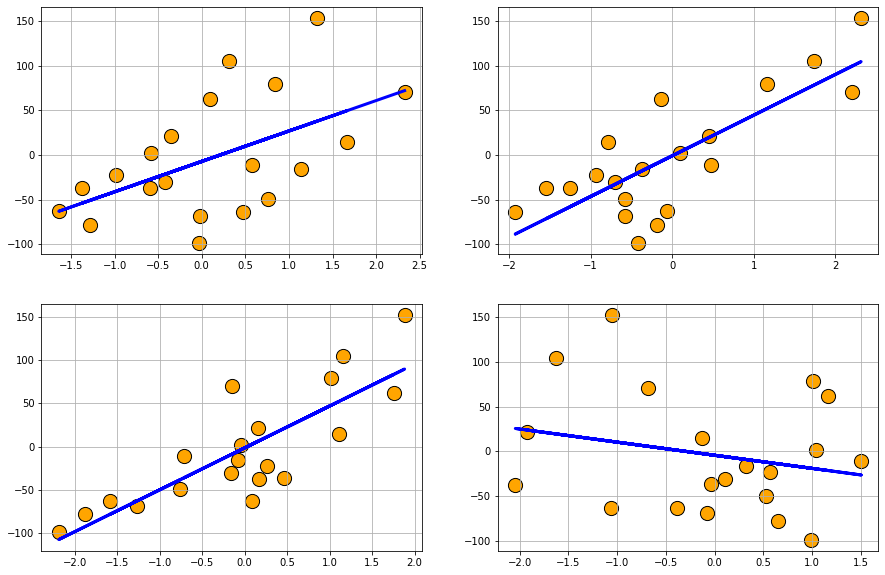

In [5]:
plt.figure(figsize=(15,10))
for i in range(1,5):
    fit = np.polyfit(df1[df1.columns[i-1]],df1['y'],1)
    fit_fn = np.poly1d(fit)
    plt.subplot(2,2,i)
    plt.scatter(df1[df1.columns[i-1]],df1['y'],s=200,c='orange',edgecolor='k')
    plt.plot(df1[df1.columns[i-1]],fit_fn(df1[df1.columns[i-1]]),'b-',lw=3)
    plt.grid(True)

### Data with Gaussian noise

In [6]:
data2 = make_regression(n_samples=20, n_features=4, n_informative=2, n_targets=1, 
                        bias=0.0, effective_rank=None,tail_strength=0.5, 
                        noise=2.0, shuffle=True, coef=False, random_state=None)
df2 = pd.DataFrame(data2[0],columns=['x'+str(i) for i in range(1,5)])
df2['y'] = data2[1]

### Plot

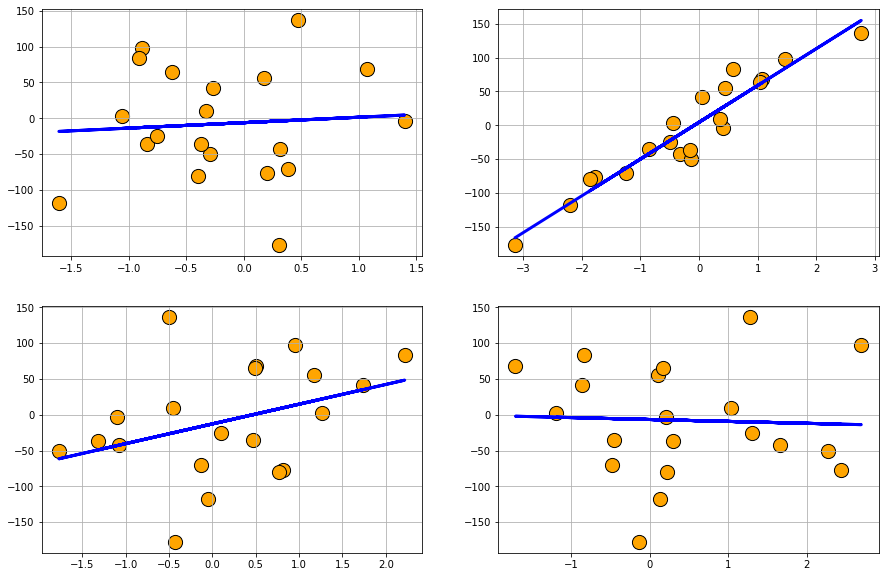

In [7]:
plt.figure(figsize=(15,10))
for i in range(1,5):
    fit = np.polyfit(df2[df2.columns[i-1]],df2['y'],1)
    fit_fn = np.poly1d(fit)
    plt.subplot(2,2,i)
    plt.scatter(df2[df2.columns[i-1]],df2['y'],s=200,c='orange',edgecolor='k')
    plt.plot(df2[df2.columns[i-1]],fit_fn(df2[df2.columns[i-1]]),'b-',lw=3)
    plt.grid(True)

### Plot datasets with varying degree of noise

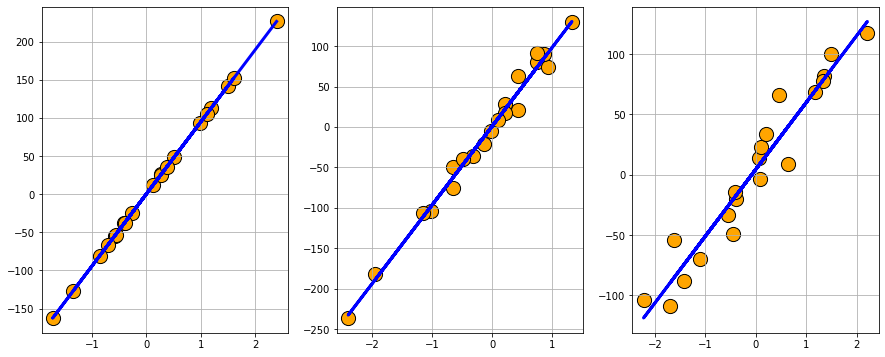

In [8]:
plt.figure(figsize=(15,6))
df2 = pd.DataFrame(data=np.zeros((20,1)))
for i in range(3):
    data2 = make_regression(n_samples=20, n_features=1, n_informative=1, n_targets=1, 
                        bias=0.0, effective_rank=None,tail_strength=0.5, 
                        noise=i*10, shuffle=True, coef=False, random_state=None)
    df2['x'+str(i+1)]=data2[0]
    df2['y'+str(i+1)] = data2[1]

for i in range(3):
    fit = np.polyfit(df2['x'+str(i+1)],df2['y'+str(i+1)],1)
    fit_fn = np.poly1d(fit)
    plt.subplot(1,3,i+1)
    plt.scatter(df2['x'+str(i+1)],df2['y'+str(i+1)],s=200,c='orange',edgecolor='k')
    plt.plot(df2['x'+str(i+1)],fit_fn(df2['x'+str(i+1)]),'b-',lw=3)
    plt.grid(True)

## Classification problem generation

Classification problem generation: Similar to the regression function above, ```dataset.make_classification``` generates a random multi-class classification problem (dataset) with controllable class separation and added noise. You can also randomly flip any percentage of output signs to create a harder classification dataset if you want.

In [9]:
from sklearn.datasets import make_classification

In [10]:
data3 = make_classification(n_samples=20, n_features=4, n_informative=4, n_redundant=0, n_repeated=0, 
                            n_classes=2, n_clusters_per_class=1, weights=None, flip_y=0.01, class_sep=1.0, 
                            hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)
df3 = pd.DataFrame(data3[0],columns=['x'+str(i) for i in range(1,5)])
df3['y'] = data3[1]

In [11]:
df3.head()

,x1,x2,x3,x4,y
0,-0.937800,0.620428,1.710371,-1.335103,0
1,-1.843944,1.498890,-0.950427,-0.315925,0
2,-0.670669,0.493982,-0.687241,-1.206348,0
3,3.140552,-2.195994,1.571735,-0.247905,1
4,1.602336,-2.151781,4.427198,-4.207194,0


### Plot

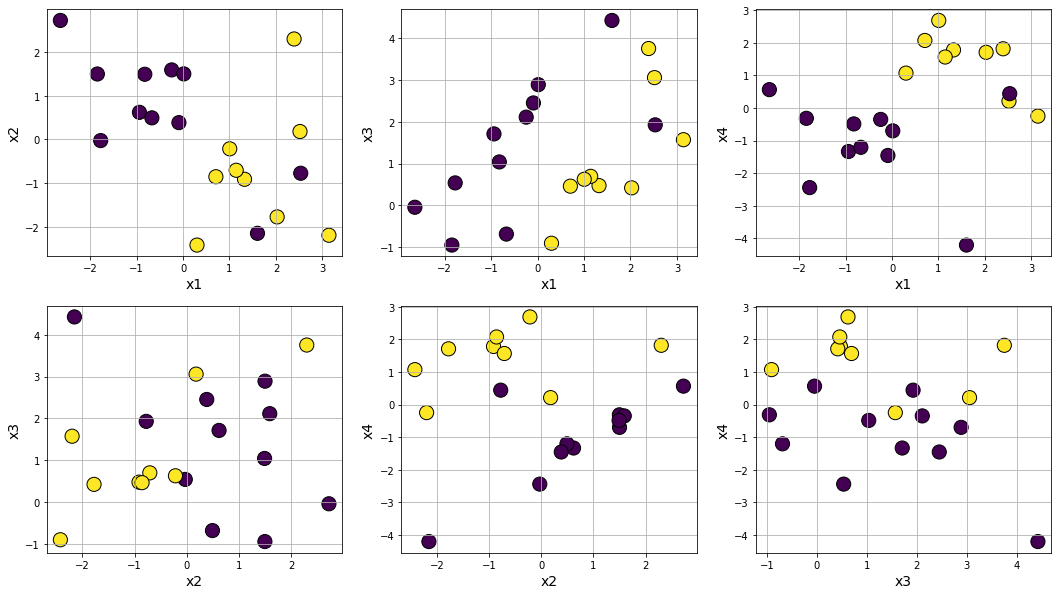

In [12]:
from itertools import combinations
from math import ceil
lst_var=list(combinations(df3.columns[:-1],2))
len_var = len(lst_var)
plt.figure(figsize=(18,10))
for i in range(1,len_var+1):
    plt.subplot(2,ceil(len_var/2),i)
    var1 = lst_var[i-1][0]
    var2 = lst_var[i-1][1]
    plt.scatter(df3[var1],df3[var2],s=200,c=df3['y'],edgecolor='k')
    plt.xlabel(var1,fontsize=14)
    plt.ylabel(var2,fontsize=14)
    plt.grid(True)

### Making class separation easy by tweaking `class_sep`

In [13]:
data3 = make_classification(n_samples=20, n_features=4, n_informative=4, n_redundant=0, n_repeated=0, 
                            n_classes=2, n_clusters_per_class=1, weights=None, flip_y=0.01, class_sep=3.0, 
                            hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)
df3 = pd.DataFrame(data3[0],columns=['x'+str(i) for i in range(1,5)])
df3['y'] = data3[1]

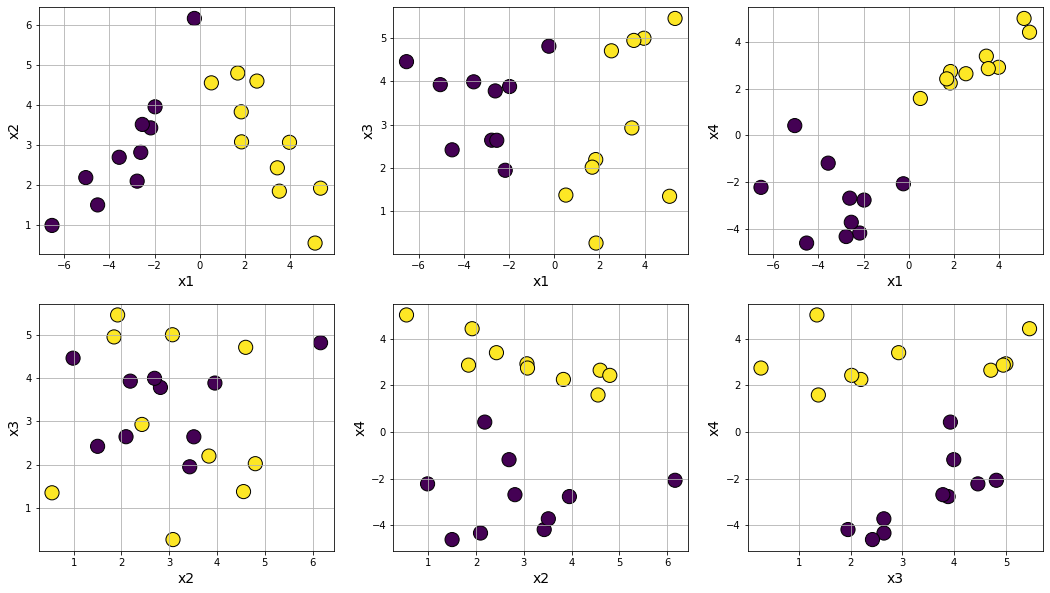

In [14]:
from itertools import combinations
from math import ceil
lst_var=list(combinations(df3.columns[:-1],2))
len_var = len(lst_var)
plt.figure(figsize=(18,10))
for i in range(1,len_var+1):
    plt.subplot(2,ceil(len_var/2),i)
    var1 = lst_var[i-1][0]
    var2 = lst_var[i-1][1]
    plt.scatter(df3[var1],df3[var2],s=200,c=df3['y'],edgecolor='k')
    plt.xlabel(var1,fontsize=14)
    plt.ylabel(var2,fontsize=14)
    plt.grid(True)

### Making class separation hard by tweaking `class_sep`

In [15]:
data3 = make_classification(n_samples=20, n_features=4, n_informative=4, n_redundant=0, n_repeated=0, 
                            n_classes=2, n_clusters_per_class=1, weights=None, flip_y=0.01, class_sep=0.5, 
                            hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)
df3 = pd.DataFrame(data3[0],columns=['x'+str(i) for i in range(1,5)])
df3['y'] = data3[1]

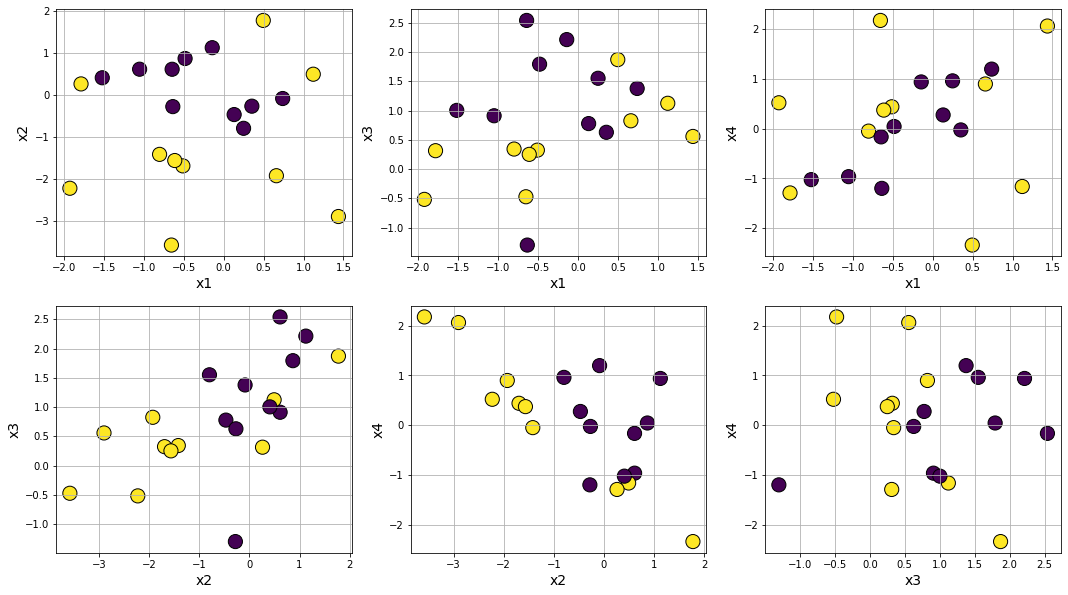

In [16]:
from itertools import combinations
from math import ceil
lst_var=list(combinations(df3.columns[:-1],2))
len_var = len(lst_var)
plt.figure(figsize=(18,10))
for i in range(1,len_var+1):
    plt.subplot(2,ceil(len_var/2),i)
    var1 = lst_var[i-1][0]
    var2 = lst_var[i-1][1]
    plt.scatter(df3[var1],df3[var2],s=200,c=df3['y'],edgecolor='k')
    plt.xlabel(var1,fontsize=14)
    plt.ylabel(var2,fontsize=14)
    plt.grid(True)

### Making data noisy by increasing `flip_y`

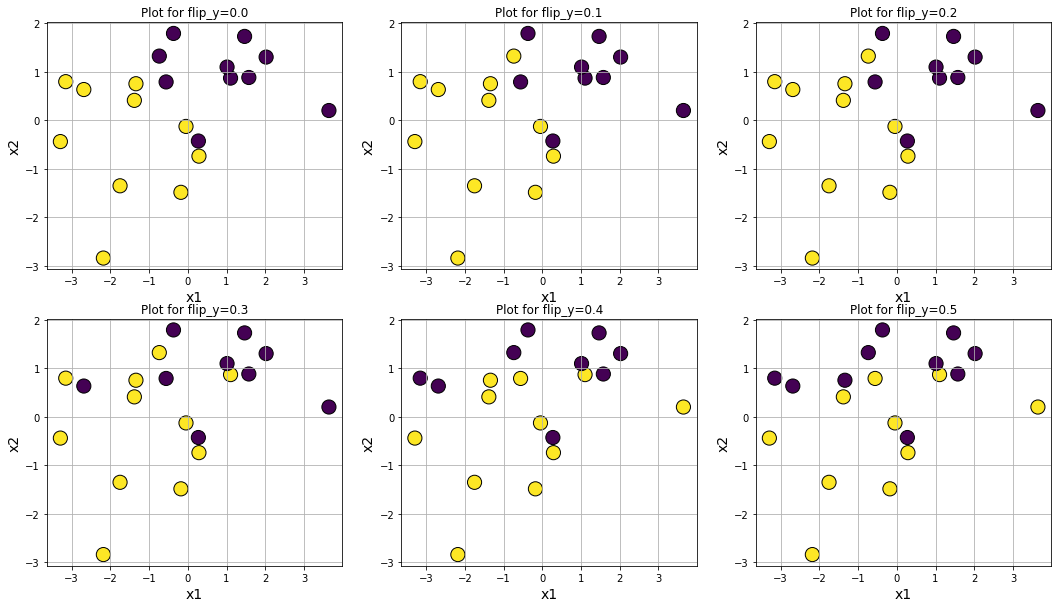

In [17]:
plt.figure(figsize=(18,10))
for i in range(6):
    data3 = make_classification(n_samples=20, n_features=4, n_informative=4, n_redundant=0, n_repeated=0, 
                                n_classes=2, n_clusters_per_class=1, weights=None, flip_y=0.1*i, class_sep=1.0, 
                                hypercube=True, shift=0.0, scale=1.0, shuffle=False, random_state=101)
    df3 = pd.DataFrame(data3[0],columns=['x'+str(i) for i in range(1,5)])
    df3['y'] = data3[1]
    plt.subplot(2,3,i+1)
    plt.title(f"Plot for flip_y={round(0.1*i,2)}")
    plt.scatter(df3['x1'],df3['x2'],s=200,c=df3['y'],edgecolor='k')
    plt.xlabel('x1',fontsize=14)
    plt.ylabel('x2',fontsize=14)
    plt.grid(True)

### Plot datasets with varying degree of class separation

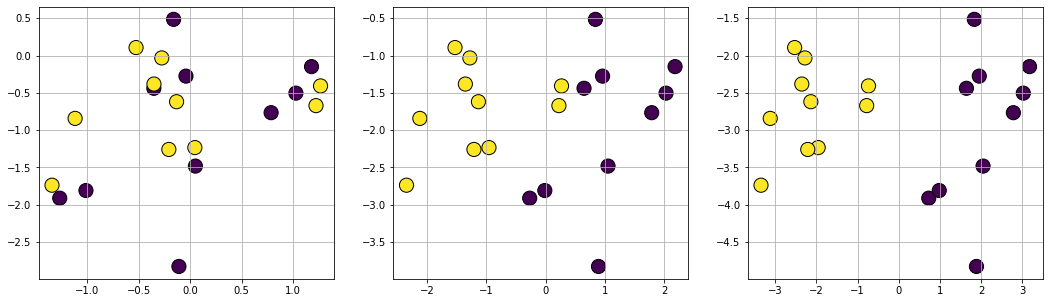

In [18]:
plt.figure(figsize=(18,5))
df2 = pd.DataFrame(data=np.zeros((20,1)))
for i in range(3):
    data2 = make_classification(n_samples=20, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, 
                                n_classes=2, n_clusters_per_class=1, weights=None, flip_y=0, class_sep=i+0.5, 
                                hypercube=True, shift=0.0, scale=1.0, shuffle=False, random_state=101)
    df2['x'+str(i+1)+'1']=data2[0][:,0]
    df2['x'+str(i+1)+'2']=data2[0][:,1]
    df2['y'+str(i+1)] = data2[1]

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.scatter(df2['x'+str(i+1)+'1'],df2['x'+str(i+1)+'2'],s=200,c=df2['y'+str(i+1)],edgecolor='k')
    plt.grid(True)

## Clustering problem generation

Clustering problem generation: There are quite a few functions for generating interesting clusters. The most straightforward one is ```datasets.make_blobs```, which generates arbitrary number of clusters with controllable distance parameters.

In [19]:
from sklearn.datasets import make_blobs

In [20]:
data4 = make_blobs(n_samples=60, n_features=4, centers=3, cluster_std=1.0, 
                   center_box=(-5.0, 5.0), shuffle=True, random_state=None)
df4 = pd.DataFrame(data4[0],columns=['x'+str(i) for i in range(1,5)])
df4['y'] = data4[1]

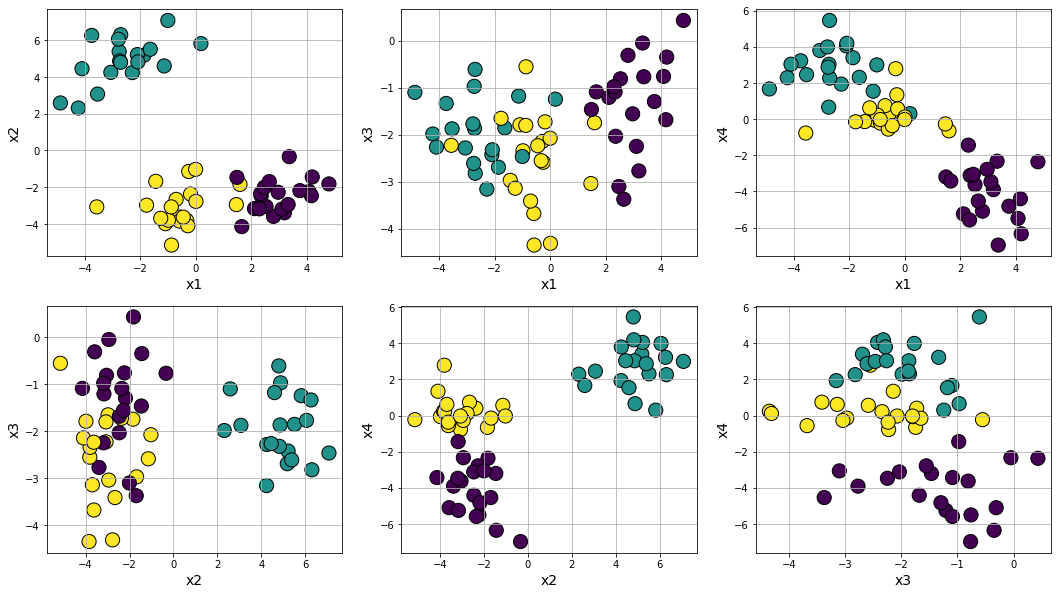

In [21]:
from itertools import combinations
from math import ceil
lst_var=list(combinations(df4.columns[:-1],2))
len_var = len(lst_var)
plt.figure(figsize=(18,10))
for i in range(1,len_var+1):
    plt.subplot(2,ceil(len_var/2),i)
    var1 = lst_var[i-1][0]
    var2 = lst_var[i-1][1]
    plt.scatter(df4[var1],df4[var2],s=200,c=df4['y'],edgecolor='k')
    plt.xlabel(var1,fontsize=14)
    plt.ylabel(var2,fontsize=14)
    plt.grid(True)

### Making clusters compact and easily separable by tweaking `cluster_std`

In [22]:
data4 = make_blobs(n_samples=60, n_features=4, centers=3, cluster_std=0.3, 
                   center_box=(-5.0, 5.0), shuffle=True, random_state=None)
df4 = pd.DataFrame(data4[0],columns=['x'+str(i) for i in range(1,5)])
df4['y'] = data4[1]

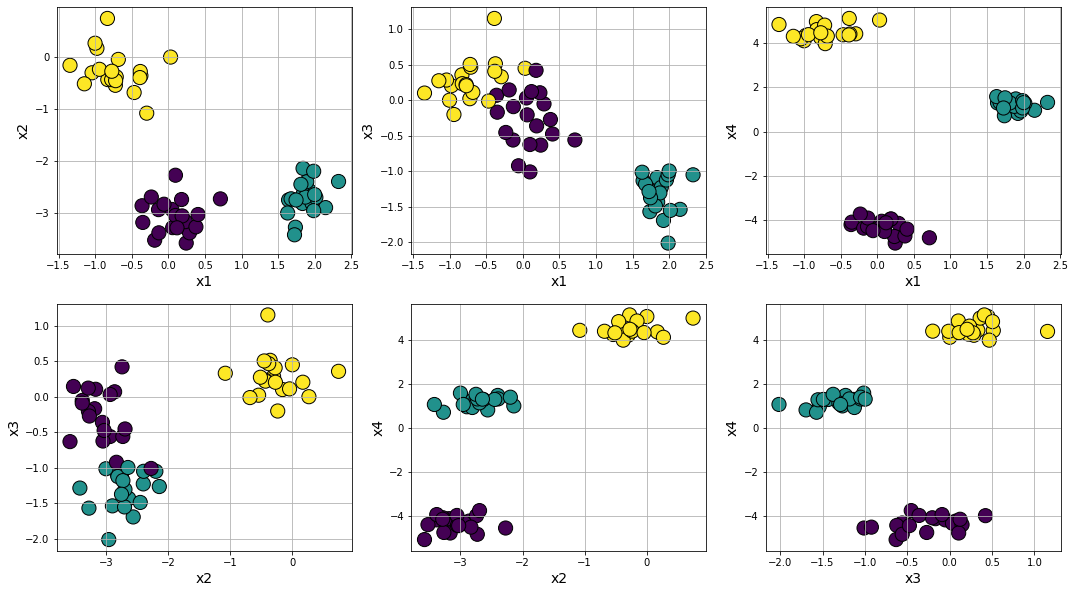

In [23]:
from itertools import combinations
from math import ceil
lst_var=list(combinations(df4.columns[:-1],2))
len_var = len(lst_var)
plt.figure(figsize=(18,10))
for i in range(1,len_var+1):
    plt.subplot(2,ceil(len_var/2),i)
    var1 = lst_var[i-1][0]
    var2 = lst_var[i-1][1]
    plt.scatter(df4[var1],df4[var2],s=200,c=df4['y'],edgecolor='k')
    plt.xlabel(var1,fontsize=14)
    plt.ylabel(var2,fontsize=14)
    plt.grid(True)

### Making clusters spread out and difficult to separate by tweaking `cluster_std`

In [24]:
data4 = make_blobs(n_samples=60, n_features=4, centers=3, cluster_std=2.5, 
                   center_box=(-5.0, 5.0), shuffle=True, random_state=None)
df4 = pd.DataFrame(data4[0],columns=['x'+str(i) for i in range(1,5)])
df4['y'] = data4[1]

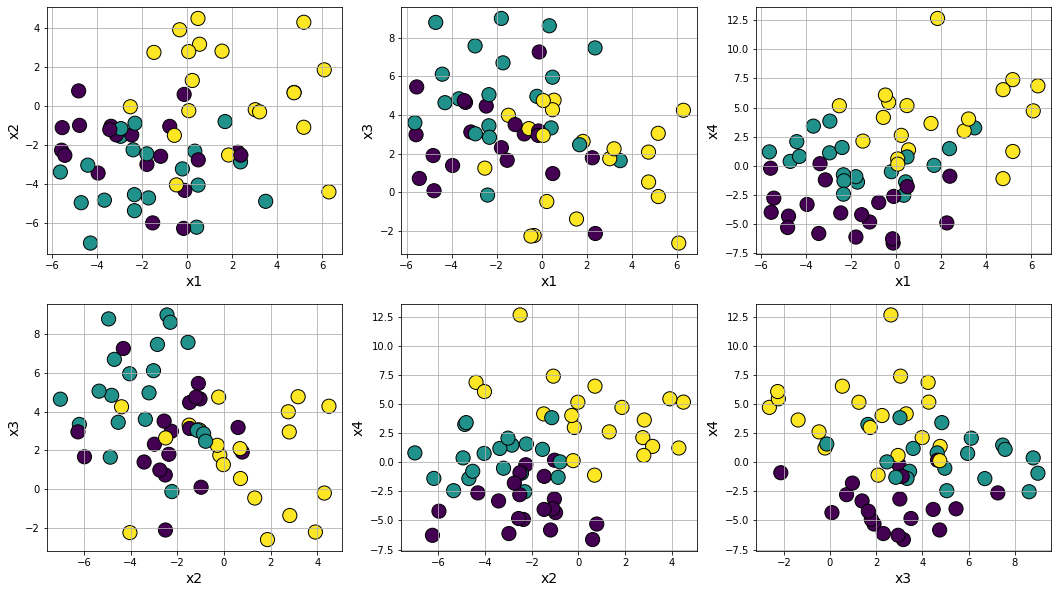

In [25]:
from itertools import combinations
from math import ceil
lst_var=list(combinations(df4.columns[:-1],2))
len_var = len(lst_var)
plt.figure(figsize=(18,10))
for i in range(1,len_var+1):
    plt.subplot(2,ceil(len_var/2),i)
    var1 = lst_var[i-1][0]
    var2 = lst_var[i-1][1]
    plt.scatter(df4[var1],df4[var2],s=200,c=df4['y'],edgecolor='k')
    plt.xlabel(var1,fontsize=14)
    plt.ylabel(var2,fontsize=14)
    plt.grid(True)

### Making anisotropically distributed clustering problem

Anisotropic cluster generation: With a simple transformation using matrix multiplication, you can generate clusters which is aligned along certain axis or anisotropically distributed.

In [26]:
data5 = make_blobs(n_samples=50, n_features=2, centers=3,cluster_std=1.5)

In [27]:
transformation = [[0.5, -0.5], [-0.4, 0.8]]

In [28]:
data5_0=np.dot(data5[0],transformation)
df5 = pd.DataFrame(data5_0,columns=['x'+str(i) for i in range(1,3)])
df5['y'] = data5[1]

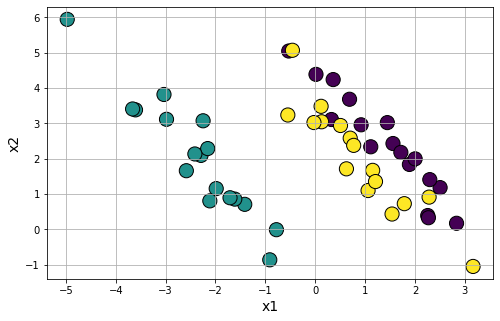

In [29]:
plt.figure(figsize=(8,5))
plt.scatter(df5['x1'],df5['x2'],c=df5['y'],s=200,edgecolors='k')
plt.xlabel('x1',fontsize=14)
plt.ylabel('x2',fontsize=14)
plt.grid(True)
plt.show()

### Making concentric circle clusters

Concentric ring cluster data generation: For testing affinity based clustering algorithm or Gaussian mixture models, it is useful to have clusters generated in a special shape. We can use ```datasets.make_circles``` function to accomplish that.

In [30]:
from sklearn.datasets import make_circles

In [31]:
data6 = make_circles(n_samples=50, shuffle=True, noise=None, random_state=None, factor=0.6)
df6 = pd.DataFrame(data6[0],columns=['x'+str(i) for i in range(1,3)])
df6['y'] = data6[1]

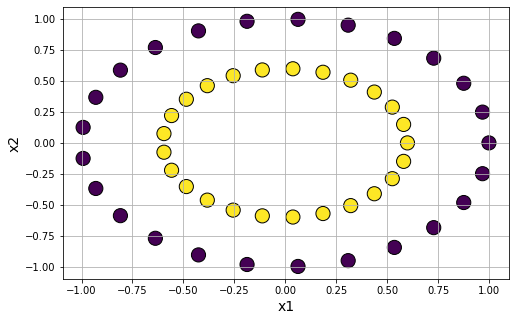

In [32]:
plt.figure(figsize=(8,5))
plt.scatter(df6['x1'],df6['x2'],c=df6['y'],s=200,edgecolors='k')
plt.xlabel('x1',fontsize=14)
plt.ylabel('x2',fontsize=14)
plt.grid(True)
plt.show()

### Introdue noise in the circle clusters

In [33]:
data6 = make_circles(n_samples=50, shuffle=True, noise=0.15, random_state=None, factor=0.6)
df6 = pd.DataFrame(data6[0],columns=['x'+str(i) for i in range(1,3)])
df6['y'] = data6[1]

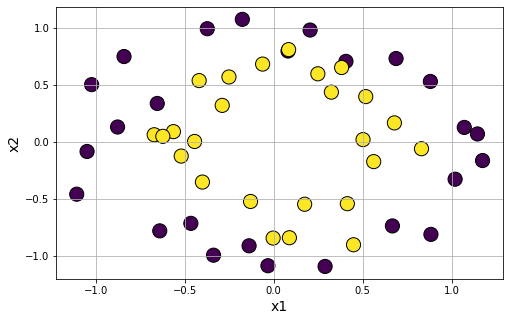

In [34]:
plt.figure(figsize=(8,5))
plt.scatter(df6['x1'],df6['x2'],c=df6['y'],s=200,edgecolors='k')
plt.xlabel('x1',fontsize=14)
plt.ylabel('x2',fontsize=14)
plt.grid(True)
plt.show()

### Make moon shape clusters

Moon-shaped cluster data generation: We can also generate moon-shaped cluster data for testing algorithms, with controllable noise using ```datasets.make_moons``` function.

In [35]:
from sklearn.datasets import make_moons

In [36]:
data7 = make_moons(n_samples=50, shuffle=True, noise=None, random_state=None)
df7 = pd.DataFrame(data7[0],columns=['x'+str(i) for i in range(1,3)])
df7['y'] = data7[1]

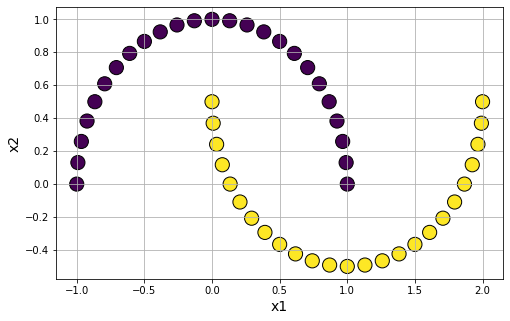

In [37]:
plt.figure(figsize=(8,5))
plt.scatter(df7['x1'],df7['x2'],c=df7['y'],s=200,edgecolors='k')
plt.xlabel('x1',fontsize=14)
plt.ylabel('x2',fontsize=14)
plt.grid(True)
plt.show()

### Introduce noise in the moon-shaped clusters

In [38]:
data7 = make_moons(n_samples=50, shuffle=True, noise=0.1, random_state=None)
df7 = pd.DataFrame(data7[0],columns=['x'+str(i) for i in range(1,3)])
df7['y'] = data7[1]

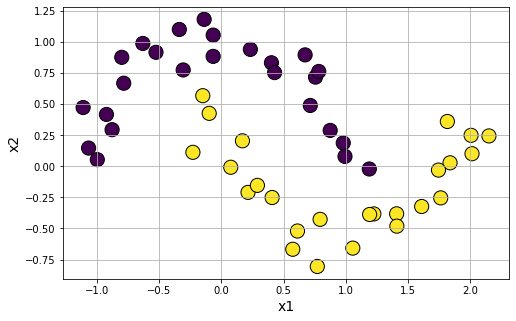

In [39]:
plt.figure(figsize=(8,5))
plt.scatter(df7['x1'],df7['x2'],c=df7['y'],s=200,edgecolors='k')
plt.xlabel('x1',fontsize=14)
plt.ylabel('x2',fontsize=14)
plt.grid(True)
plt.show()

## Random regression/classification problem generation using symbolic function

In [40]:
from Symbolic_regression_classification_generator import gen_regression_symbolic, gen_classification_symbolic

### Generate regression data with a symbolic expression of:
$$\frac{x_1^2}{2}-3x_2+20.\text{sin}(x_3)$$

In [41]:
data8 = gen_regression_symbolic(m='((x1^2)/2-3*x2)+20*sin(x3)',n_samples=50,noise=0.01)
df8=pd.DataFrame(data8, columns=['x'+str(i) for i in range(1,4)]+['y'])

In [42]:
df8.head()

,x1,x2,x3,y
0,-1.995143,1.969439,-6.585953,-9.86940209041576
1,6.694431,10.646075,-9.944827,0.416231121214657
2,0.824618,-2.154371,1.861316,25.9776280245960
3,-3.778498,4.509513,11.273044,-25.6259760456950
4,-1.664324,3.435822,-4.291008,9.33521803074928


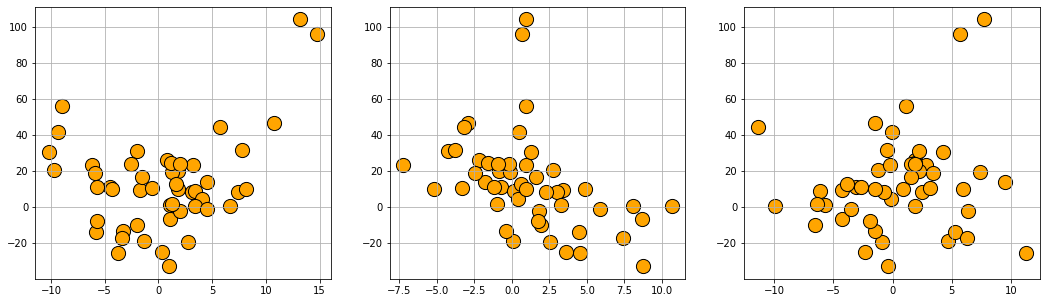

In [43]:
plt.figure(figsize=(18,5))
for i in range(1,4):
    plt.subplot(1,3,i)
    plt.scatter(df8[df8.columns[i-1]],df8['y'],s=200,c='orange',edgecolor='k')
    plt.grid(True)

### Generate regression data with a symbolic expression of:
$$x_1^2*sin(x_1)$$

In [44]:
data8 = 0.1*gen_regression_symbolic(m='x1^2*sin(x1)',n_samples=200,noise=0.05)
df8=pd.DataFrame(data8, columns=['x'+str(i) for i in range(1,2)]+['y'])

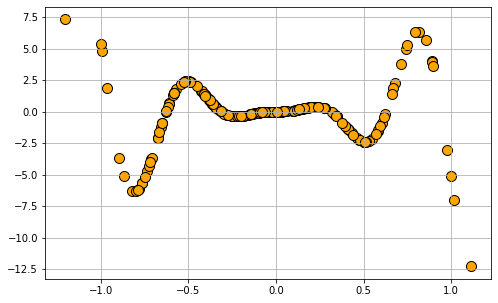

In [45]:
plt.figure(figsize=(8,5))
plt.scatter(df8['x1'],df8['y'],s=100,c='orange',edgecolor='k')
plt.grid(True)

### Generate classification data with a symbolic expression of:
$$\frac{x_1^2}{3}-\frac{x_2^2}{15}$$

In [46]:
data9 = gen_classification_symbolic(m='((x1^2)/3-(x2^2)/15)',n_samples=500,flip_y=0.01)
df9=pd.DataFrame(data9, columns=['x'+str(i) for i in range(1,3)]+['y'])

In [47]:
df9.head()

,x1,x2,y
0,0.602170,-6.029703,0.0
1,3.255014,0.452398,1.0
2,7.986863,8.692522,1.0
3,4.936118,3.508951,1.0
4,4.838671,4.002539,1.0


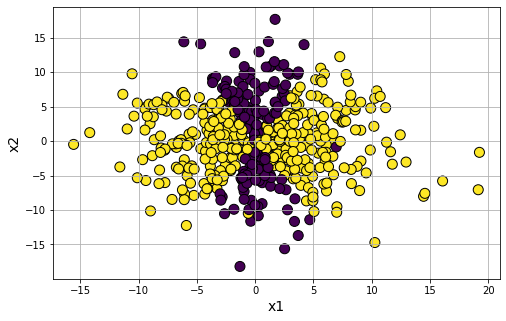

In [48]:
plt.figure(figsize=(8,5))
plt.scatter(df9['x1'],df9['x2'],c=df9['y'],s=100,edgecolors='k')
plt.xlabel('x1',fontsize=14)
plt.ylabel('x2',fontsize=14)
plt.grid(True)
plt.show()

### Generate classification data with a symbolic expression of:
$$x_1-3.\text{sin}\frac{x_2}{2}$$

In [49]:
data9 = gen_classification_symbolic(m='x1-3*sin(x2/2)',n_samples=500,flip_y=0.01)
df9=pd.DataFrame(data9, columns=['x'+str(i) for i in range(1,3)]+['y'])

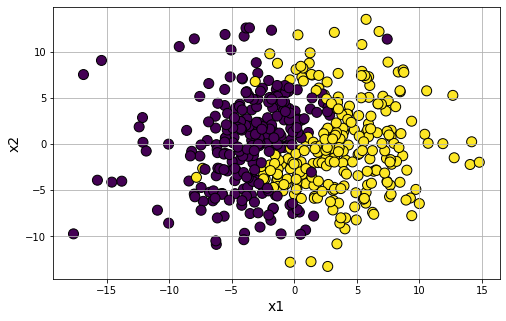

In [50]:
plt.figure(figsize=(8,5))
plt.scatter(df9['x1'],df9['x2'],c=df9['y'],s=100,edgecolors='k')
plt.xlabel('x1',fontsize=14)
plt.ylabel('x2',fontsize=14)
plt.grid(True)
plt.show()

## Categorical data generation using “pydbgen” library

While many high-quality real-life datasets are available on the web for trying out cool machine learning techniques, from my personal experience, I found that the same is not true when it comes to learning SQL.

For data science expertise, having a basic familiarity of SQL is almost as important as knowing how to write code in Python or R. But access to a large enough database with real categorical data (such as name, age, credit card, SSN, address, birthday, etc.) is not nearly as common as access to toy datasets on Kaggle, specifically designed or curated for machine learning task.

Apart from the beginners in data science, [even seasoned software testers may find it useful to have a simple tool](https://www.riaktr.com/synthetic-data-become-major-competitive-advantage/) where with a few lines of code they can generate arbitrarily large data sets with random (fake) yet meaningful entries.

Enter pydbgen. [Read the docs here](http://pydbgen.readthedocs.io/en/latest/#).

It is a [lightweight, pure-python library](https://github.com/tirthajyoti/pydbgen) to generate random useful entries (e.g. name, address, credit card number, date, time, company name, job title, license plate number, etc.) and save them in either Pandas dataframe object, or as a SQLite table in a database file, or in a MS Excel file.

## Generate name, address, phone number, email etc. using `Faker` package

This is a package you need to install first with **`pip install faker`**.

In [51]:
from faker import Faker
fake = Faker()

### Generate a fake name

In [52]:
fake.name()

'Valerie Lynch'

### Generate a license-plate (US style)

In [117]:
fake.license_plate()

'577-EQG'

### Generate a full data frame with random name, street address, SSN, email, date

In [125]:
df = pd.DataFrame()
for i in range(20):
    data = {
        'name': fake.name(),
        'street_address': fake.street_address(),
        'city': fake.city(),
        'zip_code': fake.zipcode(),
        'ssn': fake.ssn(),
        'email': fake.email(),
        'date': fake.date()
    }
    df = df.append(data, True)

In [126]:
df.head(5)

,name,street_address,city,zip_code,ssn,email,date
0,Molly Cook,5539 Gray Inlet Suite 416,Whitestad,23319,524-03-0773,anoble@example.com,1987-03-17
1,Katherine Jones,070 Christina Wells Suite 498,North Daniel,04028,586-43-5250,esolis@example.net,1984-05-21
2,Julia Reese,790 Teresa Cove Suite 479,Espinozaton,17207,848-13-7165,jhanson@example.org,1974-11-02
3,Christine Rogers,0797 Gibson Cove Suite 290,Silvachester,52803,406-94-4118,williamschad@example.net,1983-05-08
4,Dennis Mccoy,109 Michelle Rest,Gomezville,39863,572-81-2883,fosterjames@example.org,1982-05-23
